In [56]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [57]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [58]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [60]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
num_words = len(df['canonical_smiles'][max_len_idx])

In [61]:
X = df['canonical_smiles']
y = df['pIC50']

In [62]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
tk = Tokenizer(num_words=num_words, filters='', char_level=True, lower=False)
tk.fit_on_texts(X)
a = tk.texts_to_sequences(X)
X_seq_pad = pad_sequences(a, padding="pre", truncating="post", value=0.0, maxlen=207)

In [63]:
print(X[0])
print(X_seq_pad[0])

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  2  2  6  1  5 14 14  3 17  1  7  1  1  1  1  3  6  2  1 10  1  1
  1  1  1 10  4  1  7  4  1  3  9  6  4 24  5]


# Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(y_train), len(X_test)

(4082, 4082, 1021)

# Network Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [13]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
# Completar largo del vocabulario
vocab_size = len(tk.word_index)

In [15]:
max_sequence_len = X_seq_pad.shape[1]

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [16]:
# Implementar modelo completo
model = Sequential()

model.add(Embedding(input_dim = vocab_size + 1, output_dim = 64, input_length=max_sequence_len))
model.add(Bidirectional(layer=LSTM(units=100)))
model.add(Dense(units=50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 207, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000    
_________________________________________________________________
dense (Dense)                (None, 50)                10050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
________________________________________________

In [19]:
def create_callbacks():
    
    early_stop = EarlyStopping(
        monitor     = 'val_loss', 
        min_delta   = 0.01, 
        patience    = 25, 
        mode        = 'auto', 
        verbose     = 1
    )
    
    reduce_on_plateau = ReduceLROnPlateau(
        monitor  = 'val_loss',
        factor   = 0.2,
        patience = 5,
        verbose  = 1,
        mode     = 'min',
        min_delta  = 0.01,
        cooldown = 0,
        min_lr   = 1e-8
    )
    checkpoint = ModelCheckpoint(
        filepath        = 'models/best_model_{epoch}.h5', 
        monitor         = 'val_R2', 
        verbose         = 1, 
        save_best_only  = True, 
        mode            = 'max', 
        period          = 1
    )

    return [early_stop, reduce_on_plateau, checkpoint]

In [33]:
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss='mse', metrics=[R2])

In [31]:
callbacks = create_callbacks()

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
32/32 [==============================] - 26s 751ms/step - loss: 0.8215 - R2: 0.7058 - val_loss: 1.8122 - val_R2: 0.3458

Epoch 00001: val_R2 did not improve from 0.57455
Epoch 2/100
32/32 [==============================] - 24s 756ms/step - loss: 0.6113 - R2: 0.7702 - val_loss: 1.7022 - val_R2: 0.3815

Epoch 00002: val_R2 did not improve from 0.57455
Epoch 3/100
32/32 [==============================] - 25s 769ms/step - loss: 0.7304 - R2: 0.7578 - val_loss: 2.7949 - val_R2: -0.0242

Epoch 00003: val_R2 did not improve from 0.57455
Epoch 4/100
32/32 [==============================] - 24s 767ms/step - loss: 0.6892 - R2: 0.7480 - val_loss: 1.8970 - val_R2: 0.2985

Epoch 00004: val_R2 did not improve from 0.57455
Epoch 5/100
32/32 [==============================] - 25s 768ms/step - loss: 0.5925 - R2: 0.7689 - val_loss: 1.9384 - val_R2: 0.2844

Epoch 00005: val_R2 did not improve from 0.57455
Epoch 6/100
32/32 [==============================] - 25s 787ms/step - loss: 0.6709 - R2: 

In [36]:
y_pred = model.predict(X_test)

# Score

In [37]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [40]:
r2

0.5991329683598814

In [39]:
model.save('models/embed_64_bi_lstm_100_dense_50_bn.h5')

# Load model (solo si se grabo el modelo)

In [41]:
from tensorflow.keras.models import load_model

In [52]:
model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn_best.h5', custom_objects={'R2': R2})

In [53]:
y_pred = model_loaded.predict(X_test)

In [54]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.5996175105773278

¿Hasta que valores de r2 logró?

0.5996175105773278

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

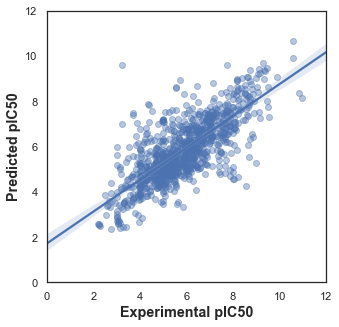

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show